# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is a little hard to understand right now... let's visualize it!

In [7]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


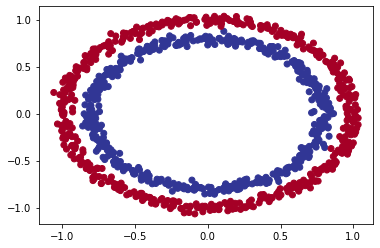

In [9]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [10]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# How many we're working with
len(X), len(y)

(1000, 1000)

In [14]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate …

In [22]:
# Create test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This is a model I built myself without the video.

In [30]:
# Create a model
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
23/25 [==========================>...] - ETA: 0s - loss: 0.6849 - accuracy: 0.5408

2022-02-13 14:11:22.426496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.5400
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.6350
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5233 - accuracy: 0.8162
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3031 - accuracy: 0.9325
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1715 - accuracy: 0.9650
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0840 - accuracy: 0.9937
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0565 - accuracy: 0.9975
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9950
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9987
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9937
Epoch 11/100
25/25 [=

In [31]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0059 - accuracy: 1.0000


2022-02-13 14:11:35.157211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.005903385113924742, 1.0]

This worked very well ;)

Back to the video!

In [33]:
# Import TensorFlow and check version
import tensorflow as tf
tf.__version__

'2.7.0'

In [32]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
22/32 [===================>..........] - ETA: 0s - loss: 1.0696 - accuracy: 0.4886

2022-02-13 14:17:28.834061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.9635 - accuracy: 0.4940
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7015 - accuracy: 0.4530
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.4600
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4730
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4920


In [34]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y) # We know this is wrong, will fix this later

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


2022-02-13 14:24:04.937436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch by adding an extra layer.

In [35]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

2022-02-13 14:38:30.769671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [36]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5000


2022-02-13 14:38:47.711317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.6939908266067505, 0.5]

## Improving our model

Let's look into our back of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the numbers of hidden units within a hidden layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [38]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers with more hidden units)
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100)) # add 100 dense neurons
model_3.add(tf.keras.layers.Dense(10)) # add another layer with 10 neurons
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

2022-02-13 14:46:54.744501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [40]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5100


[0.6953482627868652, 0.5100000500679016]

To visualize our models predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [72]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max());

2022-02-13 15:46:31.947164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


doing multiclass classification


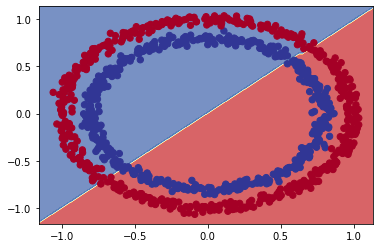

In [73]:
# Check our the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [54]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [62]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100, input_shape=(None, 1)))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit our model to the data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 13ms/step - loss: 474.6806 - mae: 474.6806
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 392.6436 - mae: 392.6436
Epoch 3/100
1/5 [=====>........................] - ETA: 0s - loss: 358.8818 - mae: 358.8818

2022-02-13 15:32:41.450101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 9ms/step - loss: 327.3944 - mae: 327.3944
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 281.7294 - mae: 281.7294
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 261.6481 - mae: 261.6481
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 257.0673 - mae: 257.0673
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 255.8052 - mae: 255.8052
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 255.7087 - mae: 255.7087
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 261.9884 - mae: 261.9884
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 257.3952 - mae: 257.3952
Epoch 11/100
5/5 [==============================] - 0s 9ms/step - loss: 257.9402 - mae: 257.9402
Epoch 12/100
5/5 [==============================] - 0s 9ms/step - loss: 256.1649 - mae: 256.1649
Epoch 13/100
5/5 [==============================]

2022-02-13 15:35:47.896997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


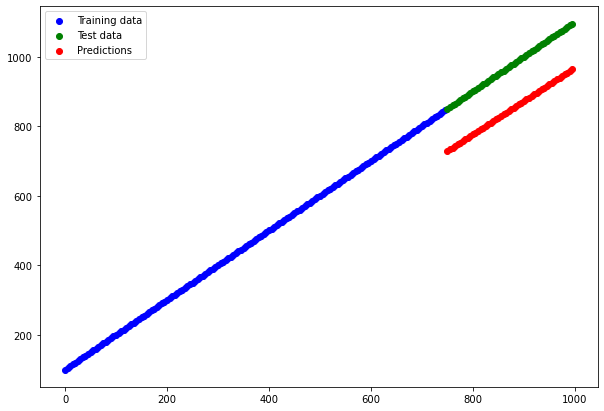

In [64]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [68]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1, activation="linear"))

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
20/32 [=================>............] - ETA: 0s - loss: 4.5320 - accuracy: 0.4906

2022-02-13 15:44:33.334719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 4.3542 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0221 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7028 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 3.4377 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 3.3373 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.1097 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 2.7954 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 2.4843 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4934 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1663 - accuracy: 0.5000
Epoch 11/100
32/32 [=

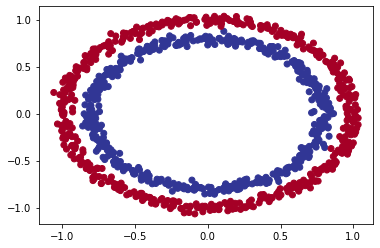

In [70]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


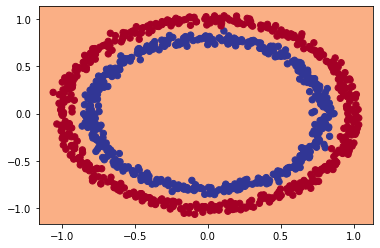

In [74]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function.

In [75]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear acivation
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.relu))

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

/Users/hartlden/Projects/introduction-to-tensorflow/env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-02-13 15:51:06.683987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 4.3542 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0221 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 3.7028 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 3.4377 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.3373 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.1097 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 2.7954 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 2.4843 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4934 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1663 - accuracy: 0.5000
Epoch 11/

In [81]:
# Time to replicate the multi-layer neural network from TensorFlow playground in TensorFlow code

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(4, activation="relu"))
model_6.add(tf.keras.layers.Dense(4, activation="relu"))
model_6.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
10/32 [========>.....................] - ETA: 0s - loss: 3.6599 - accuracy: 0.4969 

2022-02-13 16:00:21.436909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 6ms/step - loss: 2.4037 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 1.4979 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 1.3398 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 1.2223 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 1.1203 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0430 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.9918 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 0.9514 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.9196 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 0.8926 - accuracy: 0.5000
Epoch 11/250
32/32 [=

In [82]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9880


2022-02-13 16:01:10.386625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.04221177101135254, 0.9880000352859497]

**Note:** In the course this model performed far worse (50% accuracy), so let's pretend like this is still the case.

2022-02-13 16:01:44.408689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


doing binary classification


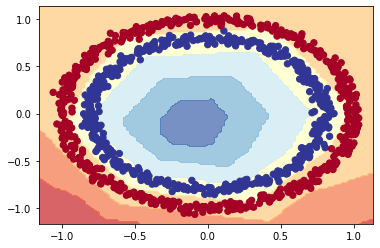

In [83]:
# How do our model's predictions look like?
plot_decision_boundary(model_6, X, y)

In [85]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(4, activation="relu"))
model_7.add(tf.keras.layers.Dense(4, activation="relu"))
model_7.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=250)

Epoch 1/250
17/32 [==============>...............] - ETA: 0s - loss: 0.6933 - accuracy: 0.4890

2022-02-13 16:06:18.047344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4960
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5180
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.4940
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.4920
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.4870
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.4960
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5100
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5080
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5090
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5130
Epoch 11/250
32/32 [=

32/32 [==============================] - 0s 4ms/step - loss: 0.1217 - accuracy: 0.9930
doing binary classification


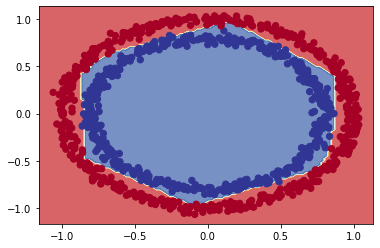

In [88]:
# 4. Evaluate the model
model_7.evaluate(X, y)
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?

**Answer:** We need to use different training and testing data, currently we only have one dataset.

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals 
of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [89]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

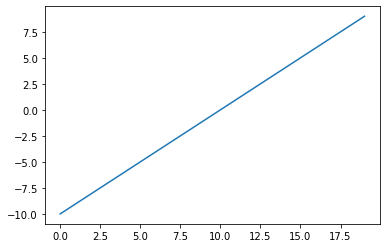

In [90]:
# Visualize our toy tensor
plt.plot(A);

In [91]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394624e-04, 3.35350167e-04, 9.11051058e-04,
       2.47262395e-03, 6.69285096e-03, 1.79862101e-02, 4.74258773e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

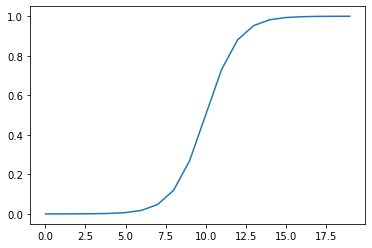

In [93]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [95]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Use the relu function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

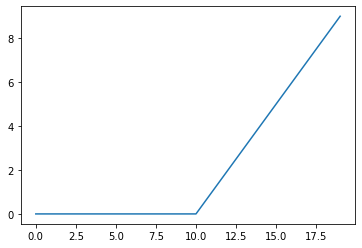

In [96]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A));

In [97]:
# Let's try the linear activation function
def linear(x):
    return x

# Use the linear function on our toy tensor
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

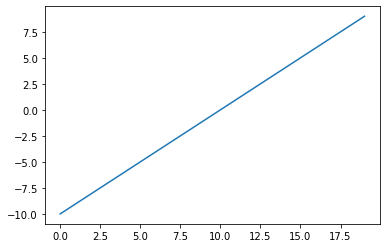

In [99]:
# Plot the linear function on our toy tensor
plt.plot(linear(A));

In [100]:
# Does A even change?
A == linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

🔑 **Note:** For our model to be able to (propperly) handle non-linear data, we need to give it non-linear activation functions. If the model just uses linear activation functions, it's never going to be able to predict non-linear data.

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [101]:
# Check how many examples we have
len(X)

1000

In [103]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [112]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (samer as model_7)
model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100, verbose=0)

2022-02-13 17:06:35.057125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [113]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.9800


2022-02-13 17:06:44.189838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.05393515154719353, 0.9799999594688416]

2022-02-13 17:06:44.335958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


doing binary classification
doing binary classification


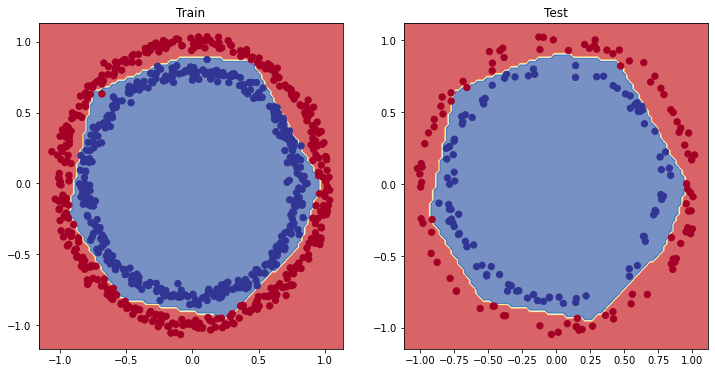

In [114]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

## Plot the loss (or training) curves

In [117]:
# Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.692701,0.50625
1,0.689999,0.52500
2,0.684830,0.52750
3,0.679059,0.56000
4,0.672510,0.56875
...,...,...
95,0.043010,0.99375
96,0.062643,0.98500
97,0.042781,0.99125
98,0.056484,0.98875


Text(0.5, 1.0, 'Model_8 loss curves')

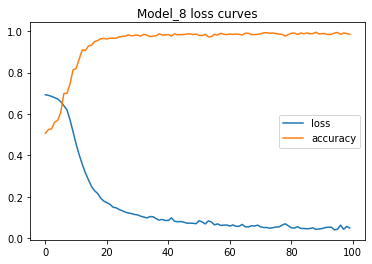

In [118]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another mdoel (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [119]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
21/25 [========================>.....] - ETA: 0s - loss: 0.6930 - accuracy: 0.5074

2022-02-13 17:20:13.824345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5225 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5163 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5238 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5238 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6925 - ac

<AxesSubplot:xlabel='epochs'>

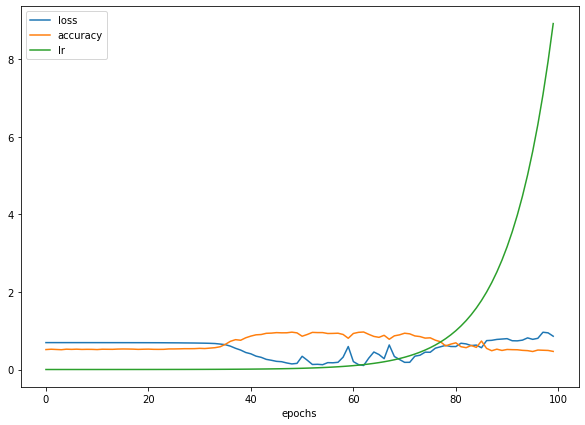

In [120]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

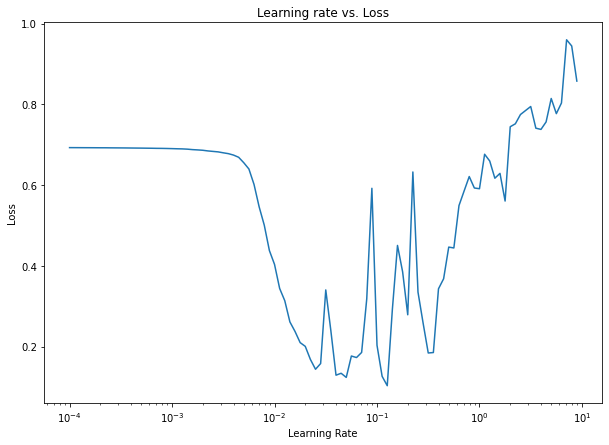

In [125]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [127]:
# Example of other learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [134]:
# Let's try using a higher *ideal* learning rate with the same model
# Because we got a better learning rate, let's try to decrease the epochs to 25

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model with ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=25, verbose=0) 

2022-02-13 17:34:03.905100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [137]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9900


[0.0347568653523922, 0.9899999499320984]

In [138]:
# Compare to model_8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9800


[0.05393515154719353, 0.9799999594688416]

We can see that model_10 performed better than model_8 even though it was trained on 25 instead of 100 epochs. Thats because it was able to update it's patterns faster by using the increased learning rate.

2022-02-13 17:42:03.239245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


doing binary classification
doing binary classification


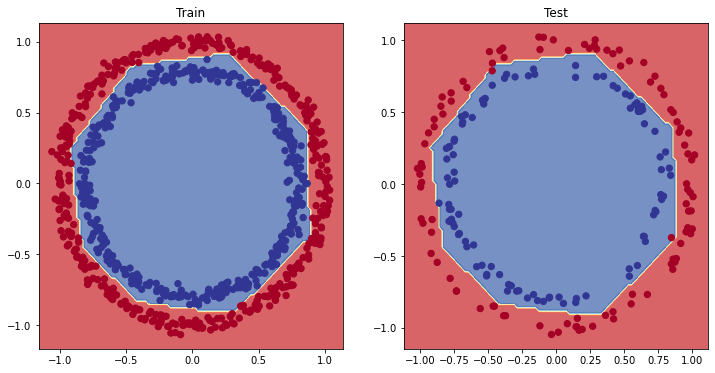

In [139]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## More classification evaluation metrics

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics, you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report (from Skikit-Learn)

In [140]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9900
Model loss on the test set: 0.0347568653523922
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [141]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [144]:
y_test[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [143]:
y_preds[:10]

array([[0.9636887 ],
       [0.99935764],
       [0.96823466],
       [0.99874926],
       [0.03594322],
       [0.00169979],
       [0.93372875],
       [0.00199594],
       [0.9975115 ],
       [0.05760833]], dtype=float32)

Oops... looks like our predictions array has come out in **predictions probability** form... the standard output from the sigmoid (or softmax) activation function.

In [146]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [147]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

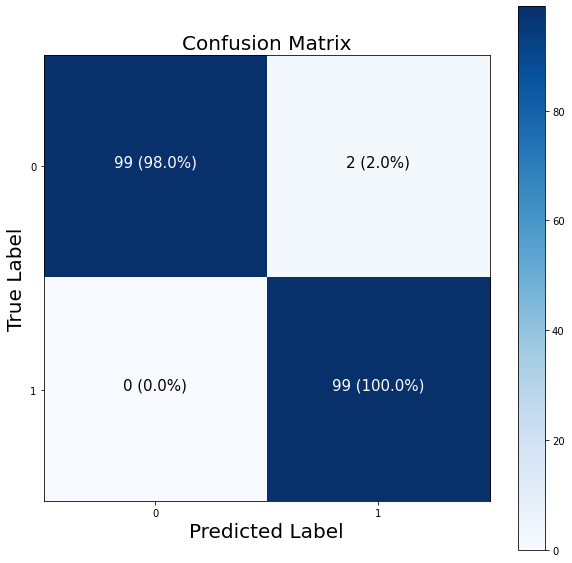

In [153]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function 

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [149]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

# Working with a larger example (multi-class classification)

When you have more than two classes as an option, it's knows as **multi-class cliassifiction**.
* This means if you have 3 different classes, it's multi-class classification.
* it also means if you have 100 different classes, it's also multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [154]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [155]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [156]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

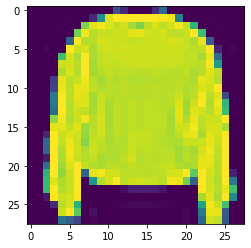

In [159]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [158]:
# Check our samples label
train_labels[7]

2

In [160]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

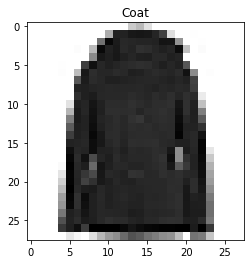

In [165]:
# Plot an example image and it's label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

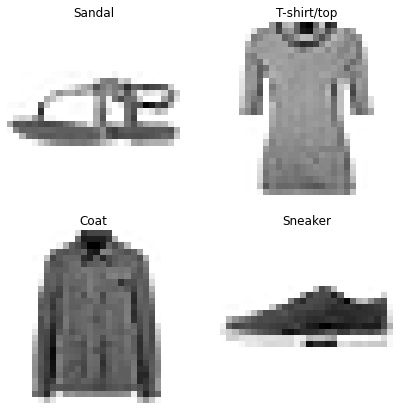

In [173]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classifiction model, we can use a similar architecture to our binary classifiers, however we're going to have to tweak a few things:
* Input shape = (28, 28) (the shape of one image)
* Output shape = 10 (amount of classes)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
  * If your labels are one-hot encoded use `CategoricalCrossentropy()`
  * If your labels are integer form use `SparseCategoricalCrossentropy()`
* Output layer activation = Softmax (not sigmoid)

In [177]:
# out data needs to flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential()
flatten_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
flatten_model.output_shape

(None, 784)

In [189]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
model_11.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
  17/1875 [..............................] - ETA: 12s - loss: 3.9753 - accuracy: 0.1379 

2022-02-13 19:33:21.686188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 2.2733 - accuracy: 0.1232

2022-02-13 19:33:34.439251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 2.2730 - accuracy: 0.1232 - val_loss: 2.1946 - val_accuracy: 0.1470
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.0635 - accuracy: 0.1986 - val_loss: 1.7547 - val_accuracy: 0.3212
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6423 - accuracy: 0.3449 - val_loss: 1.5760 - val_accuracy: 0.3930
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.4726 - accuracy: 0.4211 - val_loss: 1.3729 - val_accuracy: 0.4419
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.3464 - accuracy: 0.4481 - val_loss: 1.3406 - val_accuracy: 0.4469
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3187 - accuracy: 0.4594 - val_loss: 1.2757 - val_accuracy: 0.5109
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2859 - accuracy: 0.5005 - val_loss: 1.2617 - val_accuracy: 0.4

In [183]:
# Check the model summary
model_11.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_125 (Dense)           (None, 4)                 3140      
                                                                 
 dense_126 (Dense)           (None, 4)                 20        
                                                                 
 dense_127 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 & 1.

In [185]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the mix and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [188]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
model_11.add(tf.keras.layers.Dense(4, activation="relu"))
model_11.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_11.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
  21/1875 [..............................] - ETA: 9s - loss: 2.2696 - accuracy: 0.1577

2022-02-13 19:31:41.076683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 1.3063 - accuracy: 0.5119

2022-02-13 19:31:50.490364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 1.3063 - accuracy: 0.5119 - val_loss: 1.0072 - val_accuracy: 0.6124
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9168 - accuracy: 0.6398 - val_loss: 0.8569 - val_accuracy: 0.6608
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8039 - accuracy: 0.7106 - val_loss: 0.7916 - val_accuracy: 0.7138
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7447 - accuracy: 0.7324 - val_loss: 0.7463 - val_accuracy: 0.7315
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7170 - accuracy: 0.7405 - val_loss: 0.7319 - val_accuracy: 0.7300
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6988 - accuracy: 0.7468 - val_loss: 0.7097 - val_accuracy: 0.7452
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6857 - accuracy: 0.7522 - val_loss: 0.7283 - val_accuracy: 0.7

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

<AxesSubplot:title={'center':'Normalized data'}>

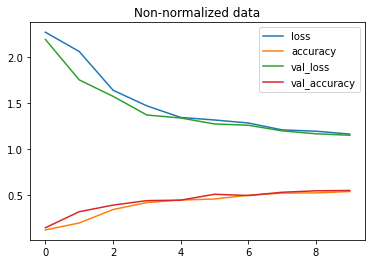

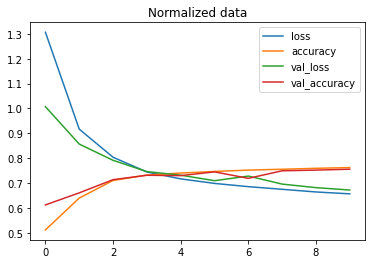

In [191]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [193]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_13.add(tf.keras.layers.Dense(4, activation="relu"))
model_13.add(tf.keras.layers.Dense(4, activation="relu"))
model_13.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
  21/1875 [..............................] - ETA: 9s - loss: 2.2696 - accuracy: 0.1577 

2022-02-13 19:39:38.104744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1866/1875 [============================>.] - ETA: 0s - loss: 1.3075 - accuracy: 0.5115

2022-02-13 19:39:47.444561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 6ms/step - loss: 1.3063 - accuracy: 0.5119 - val_loss: 1.0072 - val_accuracy: 0.6124 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9115 - accuracy: 0.6420 - val_loss: 0.8437 - val_accuracy: 0.6964 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7915 - accuracy: 0.7172 - val_loss: 0.7795 - val_accuracy: 0.7119 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7328 - accuracy: 0.7341 - val_loss: 0.7416 - val_accuracy: 0.7308 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7085 - accuracy: 0.7419 - val_loss: 0.7401 - val_accuracy: 0.7250 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6881 - accuracy: 0.7490 - val_loss: 0.6931 - val_accuracy: 0.7509 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 10s 5ms

Text(0.5, 1.0, 'Finding the ideal learning rate')

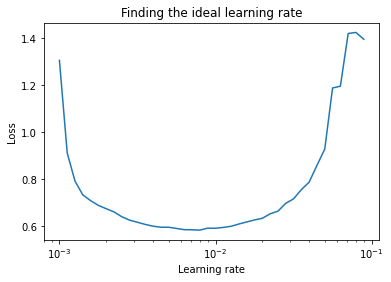

In [194]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [196]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential()
model_14.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_14.add(tf.keras.layers.Dense(4, activation="relu"))
model_14.add(tf.keras.layers.Dense(4, activation="relu"))
model_14.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model with the ideal learning rate
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/20
  21/1875 [..............................] - ETA: 9s - loss: 2.2696 - accuracy: 0.1577

2022-02-13 19:49:25.135891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1864/1875 [============================>.] - ETA: 0s - loss: 1.3079 - accuracy: 0.5113

2022-02-13 19:49:33.587139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.3063 - accuracy: 0.5119 - val_loss: 1.0072 - val_accuracy: 0.6124
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9168 - accuracy: 0.6398 - val_loss: 0.8569 - val_accuracy: 0.6608
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8039 - accuracy: 0.7106 - val_loss: 0.7916 - val_accuracy: 0.7138
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7447 - accuracy: 0.7324 - val_loss: 0.7463 - val_accuracy: 0.7315
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7170 - accuracy: 0.7405 - val_loss: 0.7319 - val_accuracy: 0.7300
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6988 - accuracy: 0.7468 - val_loss: 0.7097 - val_accuracy: 0.7452
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6857 - accuracy: 0.7522 - val_loss: 0.7283 - val_accuracy: 0.719

## Evaluating our multi-class classifiction model

To evaluate our multi-class classification model we could:
* Evaluate it's performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [197]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
        
    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set the x-axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [200]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

array([6.1192665e-08, 1.1815088e-08, 1.2213351e-10, 2.6274871e-09,
       3.5999814e-11, 7.1200177e-02, 7.3163569e-09, 3.4143984e-01,
       2.1870022e-03, 5.8517301e-01], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [201]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.1192665e-08, 1.1815088e-08, 1.2213351e-10, 2.6274871e-09,
        3.5999814e-11, 7.1200177e-02, 7.3163569e-09, 3.4143984e-01,
        2.1870022e-03, 5.8517301e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [202]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[768,   0,  25,  75,   7,   2, 112,   0,  11,   0],
       [  4, 910,   7,  38,  31,   0,   5,   0,   5,   0],
       [ 16,   1, 629,  11, 196,   0, 142,   0,   5,   0],
       [ 67,  10,   5, 800,  25,   0,  81,   0,  12,   0],
       [  1,  12, 145,  28, 725,   0,  81,   0,   8,   0],
       [  3,   0,   0,   0,   0, 891,   3,  62,  10,  31],
       [232,   1, 229,  47, 165,   0, 313,   0,  13,   0],
       [  0,   0,   0,   0,   0,  31,   0, 950,   5,  14],
       [  7,  10,  14,  15,  29,   7,  28,   8, 881,   1],
       [  3,   0,   0,   2,   0,  17,   0,  93,   4, 881]])

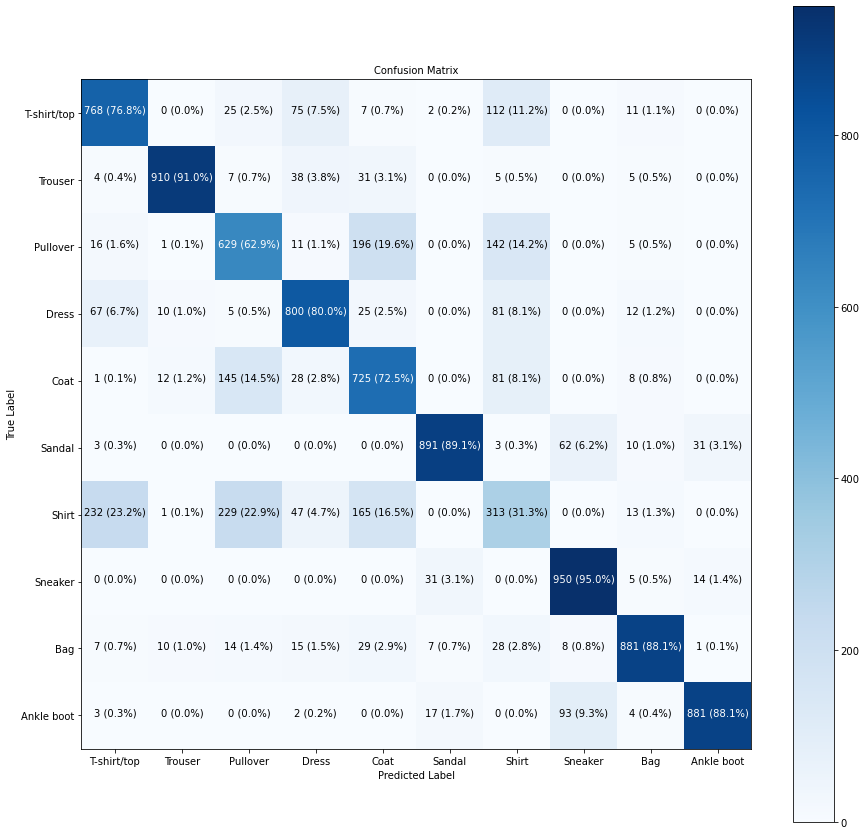

In [205]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plut with the truth label & the predicted label

In [206]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with the predicted and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # set the color to green or red based on if the prediction is right or wrong

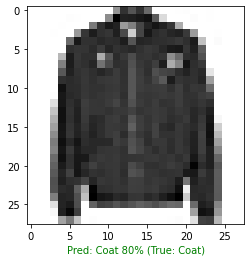

In [229]:
# Check out a random image as well as it's prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [232]:
# Find the layers of our most recent model
model_14.layers

In [233]:
# Extract particular layer
model_14.layers[1]

In [236]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.17540088, -0.00607003,  0.5698277 , -0.5165769 ],
        [-0.32263014, -0.00539681,  0.10066854, -0.33303976],
        [-1.1068548 , -0.0532832 ,  1.2618163 , -1.0963144 ],
        ...,
        [ 0.02875846,  0.06497867, -0.13409759, -0.45766765],
        [ 0.5073037 ,  0.05590169, -0.61032367, -0.12442274],
        [ 0.05031451, -0.05821457,  0.47122023, -0.4758994 ]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector

In [238]:
# Bias and biases shapes
biases, biases.shape

(array([ 1.7955005 , -0.0257703 ,  0.02357578,  1.4590197 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the vectors within the corresponding weights matrix should influence the next layer.

In [239]:
model_14.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_149 (Dense)           (None, 4)                 3140      
                                                                 
 dense_150 (Dense)           (None, 4)                 20        
                                                                 
 dense_151 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


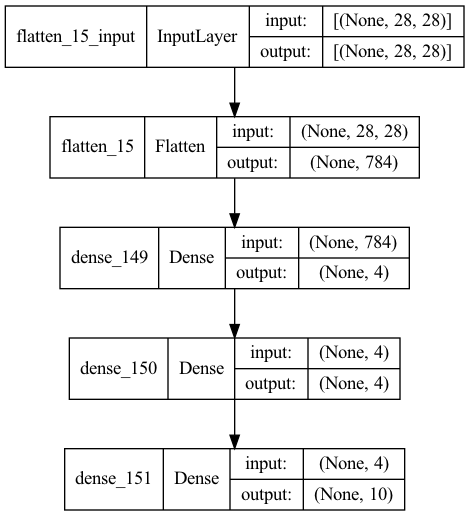

In [241]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Exercises

🛠 **Up next:** Work through exercises: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-02-neural-network-classification-with-tensorflow-exercises

## Exercise 2

Replicate the model from the exercise page using:
* Adam optimizer
* Binary Crossentropy loss
* Accuracy metric

Once it's compiled check the summary of the model

In [245]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_15 = tf.keras.Sequential()
model_15.add(tf.keras.layers.Dense(6, activation="relu", input_shape=(2,)))
model_15.add(tf.keras.layers.Dense(6, activation="relu"))
model_15.add(tf.keras.layers.Dense(6, activation="relu"))
model_15.add(tf.keras.layers.Dense(6, activation="relu"))
model_15.add(tf.keras.layers.Dense(6, activation="relu"))
model_15.add(tf.keras.layers.Dense(2, activation="sigmoid"))

# Compile the model
model_15.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Get summary of our model
model_15.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 6)                 18        
                                                                 
 dense_161 (Dense)           (None, 6)                 42        
                                                                 
 dense_162 (Dense)           (None, 6)                 42        
                                                                 
 dense_163 (Dense)           (None, 6)                 42        
                                                                 
 dense_164 (Dense)           (None, 6)                 42        
                                                                 
 dense_165 (Dense)           (None, 2)                 14        
                                                                 
Total params: 200
Trainable params: 200
Non-trainable

## Exercise 3

Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and the build a model to fit it at over 85% accuracy.

In [268]:
from sklearn.datasets import make_moons

# Create the dataset
moons_data, moons_labels = make_moons(n_samples=10000,
                                      shuffle=True,
                                      noise=0.1,
                                      random_state=42)

In [269]:
import pandas as pd

# Visualize with a DataFrame
moons_df = pd.DataFrame({"X0": moons_data[:, 0],"X1": moons_data[:, 1], "y": moons_labels})
moons_df

,X0,X1,y
0,0.455493,-0.125503,1
1,-0.704217,0.041308,0
2,0.413799,0.791322,0
3,-0.864049,0.138754,0
4,-0.936268,0.359267,0
...,...,...,...
9995,0.179911,0.138552,1
9996,0.052471,0.474023,1
9997,-0.038031,0.245408,1
9998,0.869802,0.523295,0


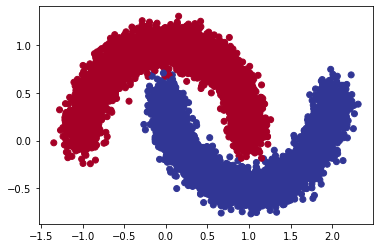

In [272]:
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(moons_data[:, 0], moons_data[:, 1], c=moons_labels, cmap=plt.cm.RdYlBu);

In [273]:
# Split data into train and test before creating the model

from sklearn.model_selection import train_test_split

moons_train_data, moons_test_data, moons_train_labels, moons_test_labels = train_test_split(moons_data,
                                                                                            moons_labels,
                                                                                            test_size=0.2,
                                                                                            random_state=42,
                                                                                            shuffle=True)

moons_train_data.shape, moons_test_data.shape, moons_train_labels.shape, moons_test_labels.shape

((8000, 2), (2000, 2), (8000,), (2000,))

### We've taken a look at the data, now let's try to build a model!

I feel like a model with three hidden layers with six neurons each is a good place to start, so let's try that.

In [275]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Build the model
model_16 = tf.keras.Sequential()
model_16.add(tf.keras.layers.Dense(6, activation="relu"))
model_16.add(tf.keras.layers.Dense(6, activation="relu"))
model_16.add(tf.keras.layers.Dense(6, activation="relu"))
model_16.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_16.compile(loss=tf.keras.losses.BinaryCrossentropy(), # BinaryCrossentropy because we are working on binary classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model_16_history = model_16.fit(moons_train_data, moons_train_labels, epochs=25) # Starting with a lower amount of epochs to see if the model works

Epoch 1/25


2022-02-14 22:59:36.668080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 2s 5ms/step - loss: 0.4589 - accuracy: 0.8363
Epoch 2/25
250/250 [==============================] - 1s 4ms/step - loss: 0.2607 - accuracy: 0.8853
Epoch 3/25
250/250 [==============================] - 1s 4ms/step - loss: 0.1921 - accuracy: 0.9161
Epoch 4/25
250/250 [==============================] - 1s 5ms/step - loss: 0.1454 - accuracy: 0.9420
Epoch 5/25
250/250 [==============================] - 1s 4ms/step - loss: 0.1063 - accuracy: 0.9586
Epoch 6/25
250/250 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9746
Epoch 7/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0480 - accuracy: 0.9860
Epoch 8/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0323 - accuracy: 0.9923
Epoch 9/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0225 - accuracy: 0.9949
Epoch 10/25
250/250 [==============================] - 1s 4ms/step - loss: 0.0165 - accuracy: 0.9973
Epoch 11/2

This looks very promissing. Maybe the model I chose actually was a bit overkill... Let's see how the model does on the test data.

In [276]:
# Evaluate the model
model_16.evaluate(moons_test_data, moons_test_labels)

27/63 [===========>..................] - ETA: 0s - loss: 9.4224e-04 - accuracy: 1.0000

2022-02-14 23:01:17.396728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 0.9985


[0.002787558827549219, 0.9985000491142273]

Looks very good! I think we absolutely smashed that goal!

## Exercise 4

Build a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

Since we already covered the dataset above, I am going to skip data exploration etc. and jump right into model creation. First, let's take a look at the model we already trained with ~77% accuracy.

In [277]:
model_14.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_149 (Dense)           (None, 4)                 3140      
                                                                 
 dense_150 (Dense)           (None, 4)                 20        
                                                                 
 dense_151 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We have two hidden layers with 4 neurons each. Let's double that!

In [279]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_17 = tf.keras.Sequential()
model_17.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_17.add(tf.keras.layers.Dense(8, activation="relu"))
model_17.add(tf.keras.layers.Dense(8, activation="relu"))
model_17.add(tf.keras.layers.Dense(8, activation="relu"))
model_17.add(tf.keras.layers.Dense(8, activation="relu"))
model_17.add(tf.keras.layers.Dense(10, activation="softmax")) # Output layer

# Compile the model
model_17.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
model_17_history = model_17.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/20


2022-02-14 23:08:32.695799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1866/1875 [============================>.] - ETA: 0s - loss: 0.8445 - accuracy: 0.6924

2022-02-14 23:08:42.952856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.8430 - accuracy: 0.6930 - val_loss: 0.5996 - val_accuracy: 0.7887
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5327 - accuracy: 0.8137 - val_loss: 0.5533 - val_accuracy: 0.7985
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4847 - accuracy: 0.8300 - val_loss: 0.5163 - val_accuracy: 0.8110
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4604 - accuracy: 0.8394 - val_loss: 0.4914 - val_accuracy: 0.8298
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4450 - accuracy: 0.8444 - val_loss: 0.4978 - val_accuracy: 0.8214
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4329 - accuracy: 0.8497 - val_loss: 0.4936 - val_accuracy: 0.8252
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4255 - accuracy: 0.8519 - val_loss: 0.4699 - val_accuracy: 0.8

Look's like we didn't hit our goal on the first try this time. Looking at the validation accuracy above it seems like our model stopped increasing after about 10 epochs, so I don't think it's worth to train for longer (at least for now).
Let's take a look at the accuracy and loss curves to confirm our suspicion.

In [ ]:
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

<AxesSubplot:>

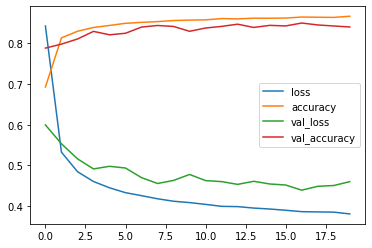

In [281]:
# Plot data loss curves
pd.DataFrame(model_17_history.history).plot()

Looks like our testing accuracy was still increasing slightly, but our validation accuracy wasn't. So let's try to add another layer to our model.

In [282]:
model_17.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_179 (Dense)           (None, 8)                 6280      
                                                                 
 dense_180 (Dense)           (None, 8)                 72        
                                                                 
 dense_181 (Dense)           (None, 8)                 72        
                                                                 
 dense_182 (Dense)           (None, 8)                 72        
                                                                 
 dense_183 (Dense)           (None, 10)                90        
                                                                 
Total params: 6,586
Trainable params: 6,586
Non-train

In [286]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_18 = tf.keras.Sequential()
model_18.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_18.add(tf.keras.layers.Dense(8, activation="relu"))
model_18.add(tf.keras.layers.Dense(8, activation="relu"))
model_18.add(tf.keras.layers.Dense(8, activation="relu"))
model_18.add(tf.keras.layers.Dense(8, activation="relu"))
model_18.add(tf.keras.layers.Dense(8, activation="relu"))
model_18.add(tf.keras.layers.Dense(10, activation="softmax")) # Output layer

# Compile the model
model_18.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
model_18_history = model_18.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/20
   9/1875 [..............................] - ETA: 13s - loss: 2.2995 - accuracy: 0.1146 

2022-02-14 23:22:54.743174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1866/1875 [============================>.] - ETA: 0s - loss: 0.9003 - accuracy: 0.6622

2022-02-14 23:23:05.289332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.8986 - accuracy: 0.6628 - val_loss: 0.6074 - val_accuracy: 0.7685
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5775 - accuracy: 0.7830 - val_loss: 0.5830 - val_accuracy: 0.7800
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5464 - accuracy: 0.7938 - val_loss: 0.5806 - val_accuracy: 0.7795
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5262 - accuracy: 0.8028 - val_loss: 0.5432 - val_accuracy: 0.7965
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5094 - accuracy: 0.8124 - val_loss: 0.5453 - val_accuracy: 0.7988
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4911 - accuracy: 0.8233 - val_loss: 0.5405 - val_accuracy: 0.8113
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4752 - accuracy: 0.8306 - val_loss: 0.5016 - val_accuracy: 0.8

Looks like we still have the same issue.

Let's try something else... I've seen how people use decreasing amounts of neurons (128, 64, 32, 16, ...) for each layer. Let's see how that goes for our problem!

In [287]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_19 = tf.keras.Sequential()
model_19.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_19.add(tf.keras.layers.Dense(128, activation="relu"))
model_19.add(tf.keras.layers.Dense(64, activation="relu"))
model_19.add(tf.keras.layers.Dense(32, activation="relu"))
model_19.add(tf.keras.layers.Dense(16, activation="relu"))
model_19.add(tf.keras.layers.Dense(8, activation="relu"))
model_19.add(tf.keras.layers.Dense(10, activation="softmax")) # Output layer

# Compile the model
model_19.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
model_19_history = model_19.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/20
   1/1875 [..............................] - ETA: 9:16 - loss: 2.3676 - accuracy: 0.0625

2022-02-14 23:28:39.713735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.6034 - accuracy: 0.7872

2022-02-14 23:28:50.720492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6033 - accuracy: 0.7873 - val_loss: 0.4475 - val_accuracy: 0.8410
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3925 - accuracy: 0.8574 - val_loss: 0.4453 - val_accuracy: 0.8456
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3507 - accuracy: 0.8718 - val_loss: 0.4032 - val_accuracy: 0.8553
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3256 - accuracy: 0.8805 - val_loss: 0.4143 - val_accuracy: 0.8504
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3094 - accuracy: 0.8854 - val_loss: 0.3948 - val_accuracy: 0.8587
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2930 - accuracy: 0.8915 - val_loss: 0.3807 - val_accuracy: 0.8615
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2837 - accuracy: 0.8946 - val_loss: 0.3807 - val_accuracy: 0.8

🥳 Looks like we just about made it above 88%!!

Now, let's take a look at the confusion matrix (using the method we already wrote above).

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

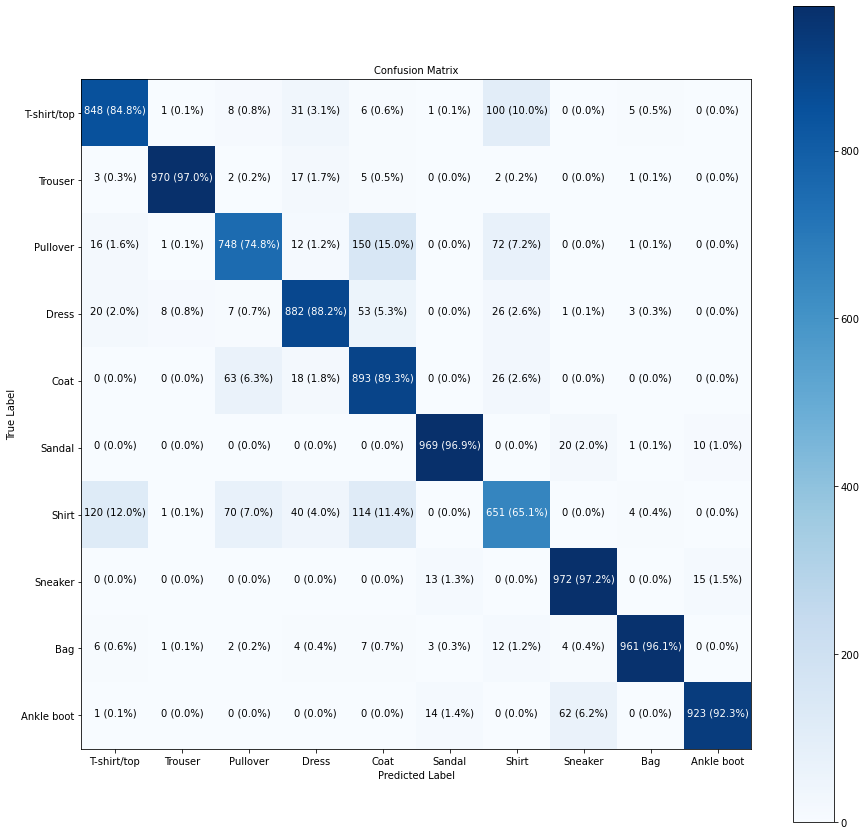

In [291]:
# Make predictions with the model (this returns probabilities)
model_19_probs = model_19.predict(test_data_norm)

# Turn probs into classes
model_19_preds = model_19_probs.argmax(axis=1)

make_confusion_matrix(y_true=test_labels,
                      y_pred=model_19_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Seems like the model still has issues with shirts and boots, which makes sense. Improved quite a bit over our previous model though!